<a href="https://colab.research.google.com/github/Rishitha1406/Face_Recognition_from_Images/blob/main/MobilePriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile price Prediction

Estimate price category of mobiles based upon features (eg : RAM , Internal Memory etc) and its selling price.

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import io
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
uploaded=files.upload()

Saving MobilePriceClassification.csv to MobilePriceClassification (1).csv


**Read the dataset**

In [ ]:
Mobile_Price=pd.read_csv(io.BytesIO(uploaded['MobilePriceClassification.csv']))

**Analyzing the dataset**

In [ ]:
Mobile_Price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
Mobile_Price.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
Mobile_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
Mobile_Price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
Mobile_Price.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
Mobile_Price.shape

(2000, 21)

In [ ]:
Mobile_Price.nunique

<bound method DataFrame.nunique of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_

In [ ]:
Mobile_Price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Split the dataset into dependent and independent**

In [ ]:
x=Mobile_Price.iloc[:,0:20].values
y=Mobile_Price.iloc[:,20].values

In [ ]:
x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [ ]:
y

array([1, 2, 2, ..., 3, 0, 3])

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

**Split the dataset into dependent and independent**

In [ ]:
x=Mobile_Price.iloc[:,0:-1].values
y=Mobile_Price.iloc[:,-1].values

In [ ]:
x.shape,y.shape

((2000, 20), (2000,))

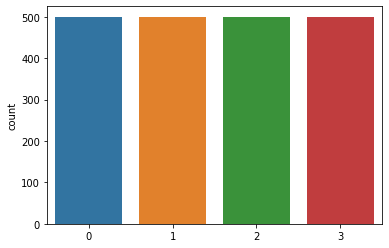

In [ ]:
sns.countplot(y)

**Splitting into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred_svm=svm_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score_svm=accuracy_score(y_pred_svm,y_test)
print('Accuracy score of the provided data using Support Vector Machine Algorithm is : ',accuracy_score_svm)

Accuracy score of the provided data using Support Vector Machine Algorithm is :  0.94


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm=confusion_matrix(y_test,y_pred_svm)
print(confusion_matrix_svm)

[[108   2   0   0]
 [  3  81   1   0]
 [  0   8  94   5]
 [  0   0   5  93]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       110
           1       0.89      0.95      0.92        85
           2       0.94      0.88      0.91       107
           3       0.95      0.95      0.95        98

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



Text(42.0, 0.5, 'Truth')

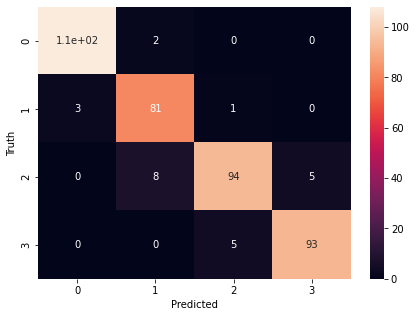

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_svm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [ ]:
accuracy_score_lr=accuracy_score(y_pred_lr,y_test)
print('Accuracy score of the provided data using Logistic Regression Algorithm is : ',accuracy_score_lr)

Accuracy score of the provided data using Logistic Regression Algorithm is :  0.65


In [ ]:
confusion_matrix_lr=confusion_matrix(y_test,y_pred_svm)
print(confusion_matrix_lr)

[[108   2   0   0]
 [  3  81   1   0]
 [  0   8  94   5]
 [  0   0   5  93]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       110
           1       0.49      0.56      0.52        85
           2       0.56      0.46      0.50       107
           3       0.67      0.80      0.73        98

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.66      0.65      0.65       400



Text(42.0, 0.5, 'Truth')

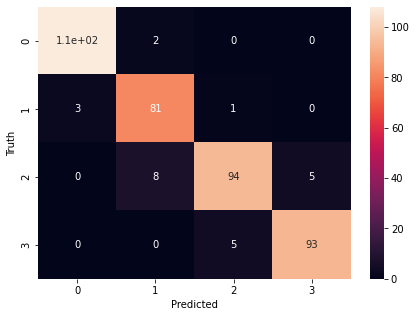

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_lr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)

In [ ]:
accuracy_score_nb=accuracy_score(y_pred_nb,y_test)
print('Accuracy score of the provided data using Naive Bayes Algorithm is : ',accuracy_score_nb)

Accuracy score of the provided data using Naive Bayes Algorithm is :  0.8275


In [ ]:
confusion_matrix_nb=confusion_matrix(y_test,y_pred_nb)
print(confusion_matrix_nb)

[[100  10   0   0]
 [  8  65  12   0]
 [  0  21  76  10]
 [  0   1   7  90]]


In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.67      0.76      0.71        85
           2       0.80      0.71      0.75       107
           3       0.90      0.92      0.91        98

    accuracy                           0.83       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.83      0.83       400



Text(42.0, 0.5, 'Truth')

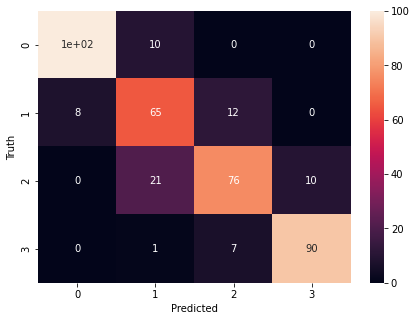

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_nb,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**K NEAREST NEIGHBOURS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [ ]:
accuracy_score_knn=accuracy_score(y_pred_knn,y_test)
print('Accuracy score of the provided data using K Nearest Neighbours Algorithm is : ',accuracy_score_knn)

Accuracy score of the provided data using K Nearest Neighbours Algorithm is :  0.925


In [ ]:
confusion_matrix_knn=confusion_matrix(y_test,y_pred_knn)
print(confusion_matrix_knn)

[[108   2   0   0]
 [  4  80   1   0]
 [  0   9  93   5]
 [  0   0   9  89]]


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.88      0.94      0.91        85
           2       0.90      0.87      0.89       107
           3       0.95      0.91      0.93        98

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



Text(42.0, 0.5, 'Truth')

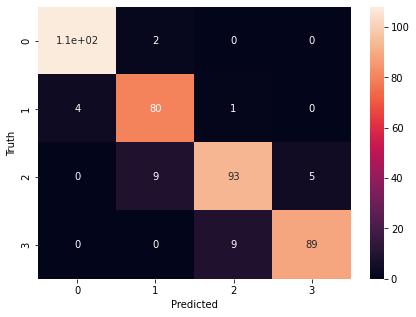

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_knn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
accuracy_score_rfc=accuracy_score(y_pred_rfc,y_test)
print('Accuracy score of the provided data using Random Forest Classifier Algorithm is : ',accuracy_score_rfc)

Accuracy score of the provided data using Random Forest Classifier Algorithm is :  0.8925


In [ ]:
confusion_matrix_rfc=confusion_matrix(y_test,y_pred_rfc)
print(confusion_matrix_rfc)

[[103   7   0   0]
 [  7  76   2   0]
 [  0  15  84   8]
 [  0   0   4  94]]


In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       0.78      0.89      0.83        85
           2       0.93      0.79      0.85       107
           3       0.92      0.96      0.94        98

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



Text(42.0, 0.5, 'Truth')

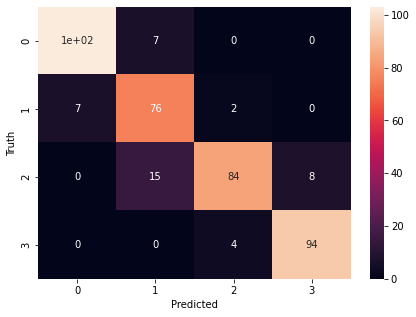

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_rfc,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
algorithms=['Support Vector Machine','Logistic Regression','Naive Bayes','K-Nearest Neighbors','Random Forest Classifier']
scores=[accuracy_score_svm,accuracy_score_lr,accuracy_score_nb,accuracy_score_knn,accuracy_score_rfc]

In [ ]:
n=len(algorithms)
for i in range(n):
  print('Accuracy score using '+algorithms[i]+' is : '+str(round(scores[i]*100))+'%')

Accuracy score using Support Vector Machine is : 94%
Accuracy score using Logistic Regression is : 65%
Accuracy score using Naive Bayes is : 83%
Accuracy score using K-Nearest Neighbors is : 92%
Accuracy score using Random Forest Classifier is : 89%


In [ ]:
for i in range(n):
  scores[i]=round(scores[i]*100)
print(scores)

[94, 65, 83, 92, 89]
